<a href="https://colab.research.google.com/github/angelfercontreras/IA_Redes_Neuronales/blob/main/PIA/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PIA.- Entrenamiento de una red neuronal convolucional**

In [1]:
'''
Materia: Inteligencia Artificial y Redes Neuronales
Hora: N4

Integrantes:
Yessica Sughey Cantú Moron           - 1900009
Jean Carlos Javier Rubio Camarillo   - 2016184
Angel Fernando Contreras García      - 2017929
Edwin Osbaldo Sánchez Guzmán         - 1966611
Hugo Andriy Sánchez Ramírez          - 1977112
'''

'\nMateria: Inteligencia Artificial y Redes Neuronales\nHora: N4\n\nIntegrantes:\nYessica Sughey Cantú Moron           - 1900009\nJean Carlos Javier Rubio Camarillo   - 2016184\nAngel Fernando Contreras García      - 2017929\nEdwin Osbaldo Sánchez Guzmán         - 1966611\nHugo Andriy Sánchez Ramírez          - 1977112\n'

In [2]:
# Se importan todas las librerias para realizar el proyecto
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
print(tf.__version__)

2.15.0


In [ ]:
# Se instala y configura API de kaggle
!pip install kaggle
from google.colab import files

In [4]:
# Se sube archivo de Token de kaggle
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"angelcontrerasg","key":"42ee3f48e56dcf320004081405659764"}'}

In [5]:
# Se configura y descargan datos de kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d niteshfre/chessman-image-dataset

Dataset URL: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset
License(s): other
chessman-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Se descomprimen datos
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/chessman-image-dataset.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [7]:
# Se coloca ruta de la carpeta principal
images_folder = "/content/Dataset/Chessman-image-dataset/Chess"

# Se colocan las etiquetas de las piezas
# Sus nombres en el orden de la carpeta son: Bishop, King, Knight, Pawn, Queen, Rook
def imagenesyetiquetas(directorio_base):
    imagenes = []
    etiquetas = []
    categorias = os.listdir(directorio_base)
    label_dict = {categoria: idx for idx, categoria in enumerate(categorias)}

    for categoria in categorias:
        ruta_carpeta = os.path.join(directorio_base, categoria)
        for archivo in os.listdir(ruta_carpeta):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            if ruta_imagen.endswith('.jpg') or ruta_imagen.endswith('.png'):
                imagen = cv2.imread(ruta_imagen)
                if imagen is not None:
                    imagen = cv2.resize(imagen, (150, 150))  # Tamaño del redimencionamiento de imagenes
                    imagenes.append(imagen)
                    etiquetas.append(label_dict[categoria])

    imagenes = np.array(imagenes)
    etiquetas = np.array(etiquetas)
    return imagenes, etiquetas, label_dict

# Directorio base donde están las carpetas de imágenes
directorio_base = '/content/Dataset/Chessman-image-dataset/Chess'

imagenes, etiquetas, label_dict = imagenesyetiquetas(directorio_base)

# Se muestra las etiquetas de los datos
print("Diccionario de etiquetas:", label_dict)

# Se muestran sus imagenes y sus etiquetas
print("Número de imágenes cargadas:", len(imagenes))
print("Número de etiquetas cargadas:", len(etiquetas))
print("Primeras 5 etiquetas:", etiquetas[:5])

Diccionario de etiquetas: {'Bishop': 0, 'Rook': 1, 'Knight': 2, 'King': 3, 'Pawn': 4, 'Queen': 5}
Número de imágenes cargadas: 534
Número de etiquetas cargadas: 534
Primeras 5 etiquetas: [0 0 0 0 0]


In [8]:
# Se imprime el numero de clases
num_classes = len(label_dict)
print(f"Number of classes: {num_classes}")

Number of classes: 6


In [9]:
np.shape(imagenes)

(534, 150, 150, 3)

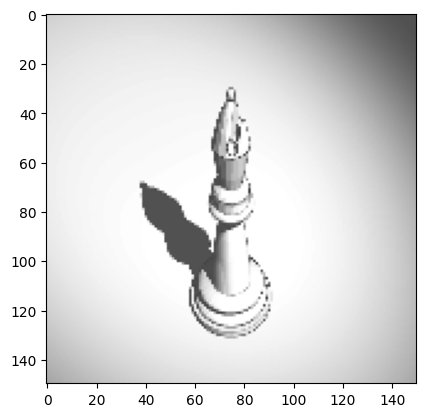

In [10]:
# Se muestra imagen 10
plt.imshow(imagenes[10])

In [11]:
# Se dividen datos en entrenamiento y prueba
train_images, test_images, train_labels, test_labels = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [12]:
# Se muestran datos de Imagenes
print("Número total de etiquetas:", len(train_labels))
print("úmero total de imágenes:", len(train_images))
print("Cantidad de imágenes y el tamaño de cada imagen:", train_images.shape)

Número total de etiquetas: 427
úmero total de imágenes: 427
Cantidad de imágenes y el tamaño de cada imagen: (427, 150, 150, 3)


In [13]:
# Normalización de valores de pixeles.
train_images = train_images / 255.0
test_images = test_images / 255.0

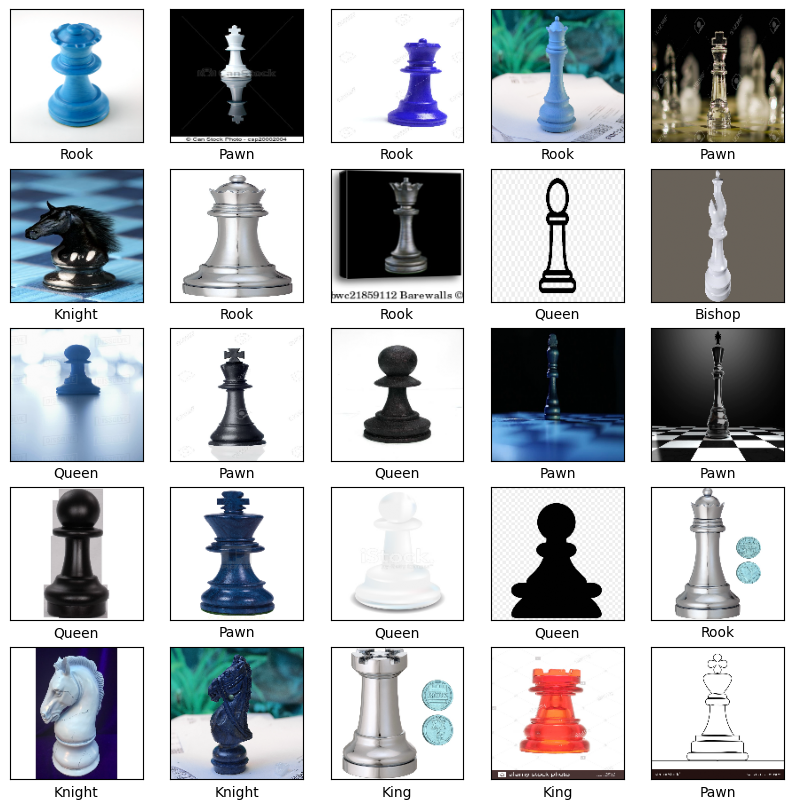

In [14]:
# Se muestran algunas piezas con sus etiquetas
class_names = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
# Se comienza con el entrenamiento de Red Neuronal Artificial Convolusional (RNAC)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
# Se añaden capas
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(12, activation='softmax'))

In [17]:
# Se observa resumen
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [18]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 18s 1s/step - loss: 2.5823 - accuracy: 0.1522 - val_loss: 2.0791 - val_accuracy: 0.1869
Epoch 2/10
14/14 [==============================] - 17s 1s/step - loss: 1.8065 - accuracy: 0.2482 - val_loss: 1.8439 - val_accuracy: 0.2243
Epoch 3/10
14/14 [==============================] - 18s 1s/step - loss: 1.6386 - accuracy: 0.3162 - val_loss: 1.7005 - val_accuracy: 0.3178
Epoch 4/10
14/14 [==============================] - 17s 1s/step - loss: 1.3046 - accuracy: 0.5176 - val_loss: 1.7775 - val_accuracy: 0.3364
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.9863 - accuracy: 0.6253 - val_loss: 1.8734 - val_accuracy: 0.3084
Epoch 6/10
14/14 [==============================] - 18s 1s/step - loss: 0.7679 - accuracy: 0.7354 - val_loss: 1.9508 - val_accuracy: 0.3084
Epoch 7/10
14/14 [==============================] - 18s 1s/step - loss: 0.5474 - accuracy: 0.7916 - val_loss: 3.6244 - val_accuracy: 0.3178
Epoch 8/10
14/14 [=============

In [19]:
# Se imprime la exactitud
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Loss: {test_loss}')
print(f'Accuracy: {test_acc}')

4/4 - 1s - loss: 2.7544 - accuracy: 0.3364 - 1s/epoch - 254ms/step
Loss: 2.7544212341308594
Accuracy: 0.336448609828949


Se cree que la exactitud del modelo salio baja debido a que el conjunto de datos cuenta con fondo y son pocas imagenes

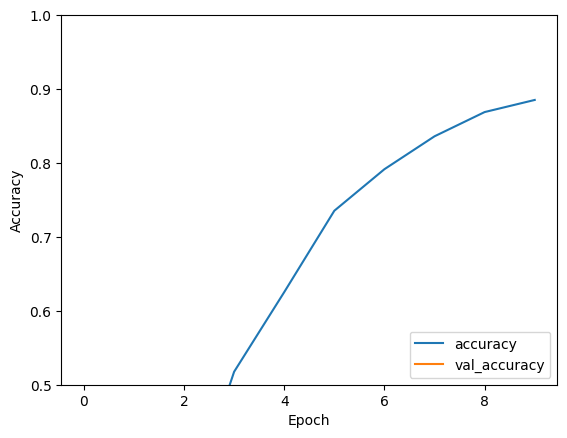

4/4 - 1s - loss: 2.7544 - accuracy: 0.3364 - 1s/epoch - 257ms/step


In [20]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [21]:
# Predicciones
predictions = model.predict(test_images)

4/4 [==============================] - 1s 233ms/step


In [22]:
# Se realizan las 5 predicciones
x1 = test_labels[1]
y1 = np.argmax(predictions[1])
x2 = test_labels[2]
y2 = np.argmax(predictions[2])
x3 = test_labels[3]
y3 = np.argmax(predictions[3])
x4 = test_labels[4]
y4 = np.argmax(predictions[4])
x5 = test_labels[5]
y5 = np.argmax(predictions[5])
print("Predicción; ", x1, "Clase:",y1)
print("Predicción; ", x2, "Clase:",y2)
print("Predicción; ", x3, "Clase:",y3)
print("Predicción; ", x4, "Clase:",y4)
print("Predicción; ", x5, "Clase:",y5)

Predicción;  1 Clase: 4
Predicción;  1 Clase: 1
Predicción;  2 Clase: 1
Predicción;  1 Clase: 1
Predicción;  4 Clase: 5


In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array[:6], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

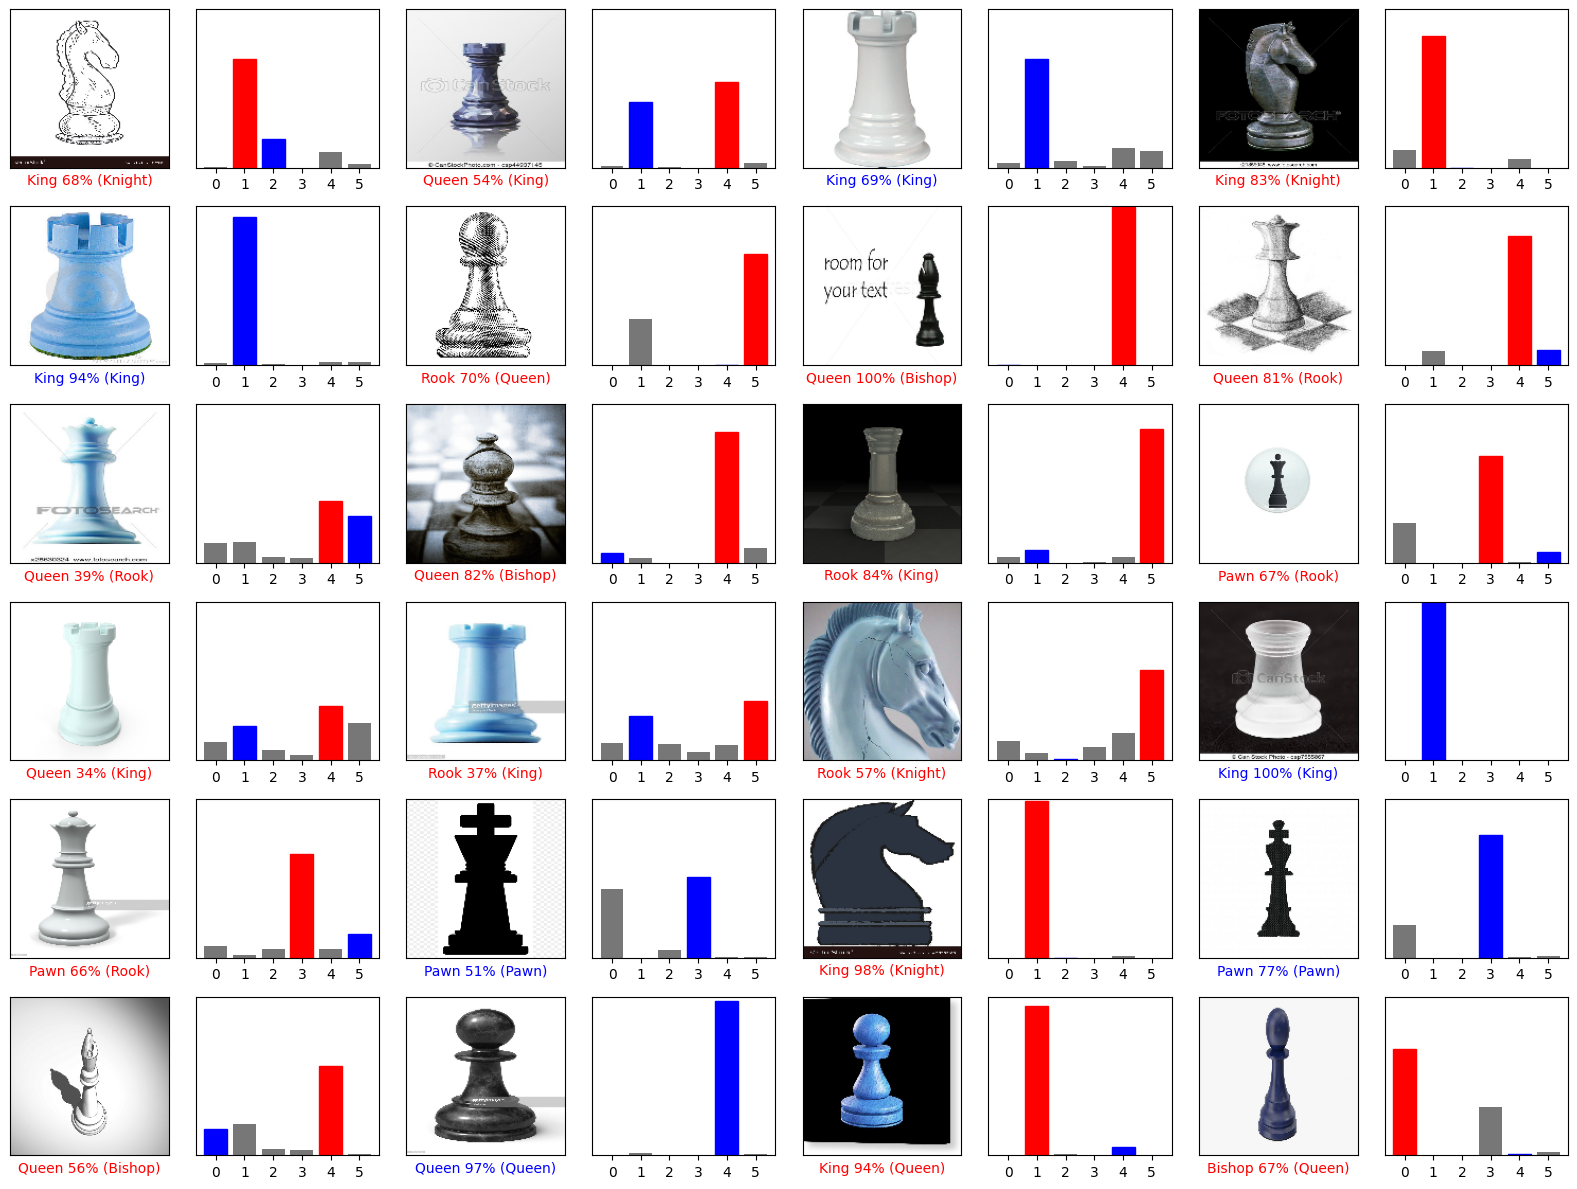

In [24]:
# Se grafican multiples imagenes con su grafica
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()